In [1]:
reset -fs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import DistanceMetric
%matplotlib inline

plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', 100)

In [3]:
full_data = pd.read_csv("ts_corn_47yr_df.csv")

full_data.fips_code = full_data.fips_code.astype(str).apply(lambda x: x.zfill(5))
full_data.set_index('fips_code', inplace=True)
full_data.columns = full_data.columns.astype(int)
full_data.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


# Randomly create an array of years to remove from complete dataset

In [5]:
pop_list = np.random.randint(1970,2017, full_data.shape[0])
pop_list[:5]

array([1990, 2009, 2014, 1976, 2002])

/Users/adamszabunio/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


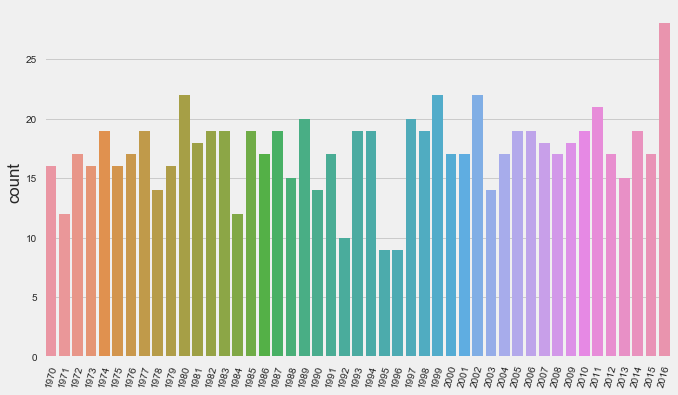

In [6]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=75)
sns.countplot(pop_list); # distribution of random draws (count by year) TODO: add x/y labels, titles, and legends to all plots

# Keep track of all the removed data 

In [7]:
true = [full_data.iloc[i][yr] for i, yr in enumerate(pop_list)]
true[:5]

[60.600000000000001, 130.0, 187.09999999999999, 68.0, 102.0]

In [8]:
full_test = full_data.copy() # make a copy before removing data
for i, yr in enumerate(pop_list):
    full_test.iloc[i][yr] = np.nan 

In [9]:
full_test.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,NaN,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,NaN,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,NaN,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,NaN,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,NaN,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


### Save test set with missing values to try additional imputation techniques

In [10]:
full_test.to_csv("corn_test_df.csv") 

# Plot Linear Regression on data with one random missing value for each year 


 For Random Year: 1990 and Fips Code: 01049
 True: 60.60
 Predicted: 77.39
 Residual: 16.79


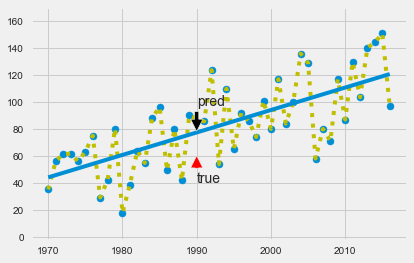


 For Random Year: 1992 and Fips Code: 18009
 True: 143.90
 Predicted: 120.96
 Residual: -22.94


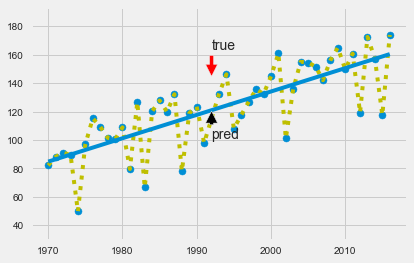


 For Random Year: 2005 and Fips Code: 19087
 True: 153.00
 Predicted: 149.59
 Residual: -3.41


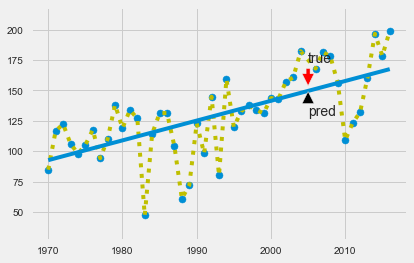


 For Random Year: 1988 and Fips Code: 21231
 True: 71.00
 Predicted: 107.05
 Residual: 36.05


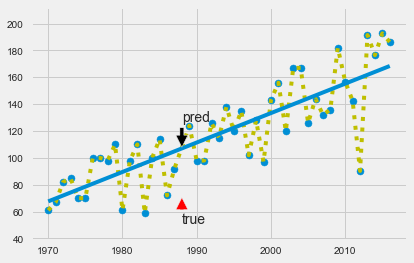


 For Random Year: 2015 and Fips Code: 27147
 True: 201.40
 Predicted: 184.02
 Residual: -17.38


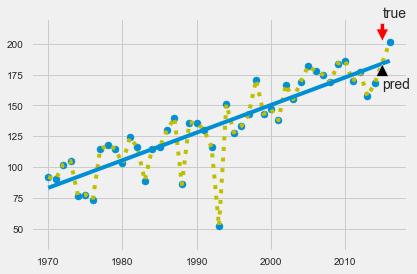


 For Random Year: 1995 and Fips Code: 31137
 True: 145.30
 Predicted: 165.38
 Residual: 20.08


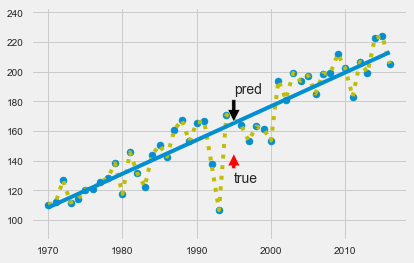


 For Random Year: 2007 and Fips Code: 39099
 True: 128.10
 Predicted: 130.16
 Residual: 2.06


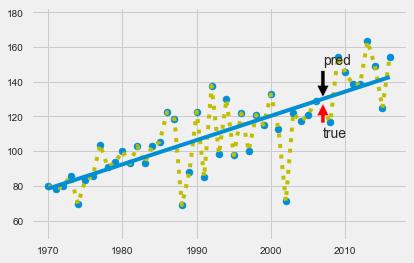


 For Random Year: 1975 and Fips Code: 47047
 True: 58.00
 Predicted: 50.85
 Residual: -7.15


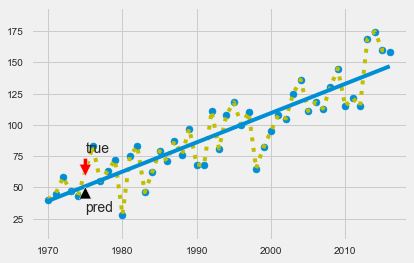


 For Random Year: 1977 and Fips Code: 55109
 True: 101.50
 Predicted: 82.44
 Residual: -19.06


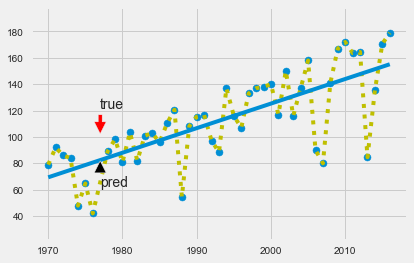

In [11]:
for i in range(0, full_data.shape[0], 100):
    X = full_data.columns.tolist() # years (1970 - 2016)
    X.remove(pop_list[i]) # remove the randomly chosen year
    X_miss = np.array(X).reshape(-1,1) # Final X to use for predictions
    y = full_test.iloc[i].dropna().values 
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    X_full = np.array(full_data.columns).reshape(-1,1) # X to predict on for all years
    preds = lm.predict(X_full)
    pred_val = preds[pop_list[i]-1970] # idx for the predicition of missing val
    pred_yr = pop_list[i] # year of missing point
    
    print("\n For Random Year: {} and Fips Code: {}\n True: {:.2f}\n Predicted: {:.2f}\n Residual: {:.2f}"\
          .format(pred_yr, full_test.iloc[i].name, true[i], pred_val, pred_val-true[i]))
    
    if pred_val > true[i]: # set bounds for plotting points
        dist = 20
    else:
        dist = -20
    plt.ylim(min(true[i], min(y))-20, max(y)+20) # set bounds for y-axis to capture extreme true values
    plt.annotate('pred', xy=(pred_yr, pred_val), xytext=(pred_yr, pred_val+dist),
                arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate('true', xy=(pred_yr, true[i]), xytext=(pred_yr, true[i]-dist),
                arrowprops=dict(facecolor='red', shrink=0.05))
    plt.scatter(X_miss, y) # "complete" data (w/o removed value)
    plt.plot(X_miss, y, 'y:') 
    plt.plot(X_full, preds) # line of best fit
    plt.show();
plt.close('all')

# LR predictions for all missing values

In [12]:
y_pred = []
for i in range(full_data.shape[0]):
    X = full_data.columns.tolist()
    X.remove(pop_list[i])
    X_miss = np.array(X).reshape(-1,1)
    y = full_test.iloc[i].dropna().values
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    X_full = np.array(full_data.columns).reshape(-1,1)
    preds = lm.predict(X_full)
    y_pred.append(preds[pop_list[i]-1970])

In [13]:
predictions = pd.DataFrame({"years":pop_list}, index=full_data.index)
predictions["y_true"] = true
predictions["lr_preds"] = y_pred

# Spatial Predictions 

In [14]:
centroids_df = pd.read_csv("county_centroids.csv", index_col=0)
centroids_df.fips_code = centroids_df.fips_code.astype(str).apply(lambda x: x.zfill(5))
centroids_df.set_index('fips_code', inplace=True)
full_data_centroids = full_data.join(centroids_df) 
full_spatial = full_data_centroids[['latitude', 'longitude']]
full_spatial.head()

,latitude,longitude
fips_code,,
01049,34.459800,-85.804109
01077,34.901407,-87.654010
01079,34.521676,-87.310989
01083,34.810099,-86.981401
01089,34.763090,-86.550226


# Haversine Distance

In [15]:
full_hav_df = full_spatial.copy()
full_hav_df.latitude = full_hav_df.latitude.apply(lambda x : x*np.pi/180)
full_hav_df.longitude = full_hav_df.longitude.apply(lambda x : x*np.pi/180)

dist = DistanceMetric.get_metric("haversine")
hav_dist_df = pd.DataFrame(dist.pairwise(full_hav_df))

hav_dist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813
0,0.000000,0.027646,0.021704,0.017978,0.011953,0.073580,0.072939,0.073648,0.079829,0.500626,0.508854,0.277779,0.249900,0.164157,0.167133,0.163229,0.058206,0.060338,0.053983,0.066709,0.067840,0.062969,0.058253,0.122046,0.118057,0.131565,0.144310,0.114307,0.104556,0.101088,0.088371,0.090626,0.135951,0.098558,0.095005,0.089223,0.091135,0.112216,0.075691,0.121344,0.067028,0.106735,0.124433,0.127541,0.131562,0.134213,0.113227,0.085939,0.102775,0.150523,...,0.176895,0.190688,0.217231,0.199089,0.164291,0.168249,0.158032,0.161184,0.200329,0.193648,0.166204,0.161157,0.152498,0.168787,0.160243,0.184734,0.154769,0.175108,0.144914,0.177189,0.179752,0.154778,0.170748,0.189710,0.170405,0.177817,0.187336,0.177405,0.195244,0.199802,0.211363,0.181722,0.147870,0.167736,0.150059,0.204921,0.204812,0.166246,0.184588,0.164207,0.187325,0.173309,0.148037,0.214866,0.158919,0.153181,0.179795,0.174724,0.183493,0.286060
1,0.027646,0.000000,0.008255,0.009764,0.015996,0.046817,0.045391,0.046407,0.052186,0.472993,0.481217,0.250721,0.222815,0.183426,0.185438,0.183375,0.078058,0.087877,0.073616,0.091323,0.095285,0.080291,0.080617,0.101367,0.098177,0.116365,0.128899,0.095531,0.091743,0.084136,0.069228,0.076739,0.122984,0.085322,0.083387,0.073740,0.074043,0.099719,0.056815,0.103423,0.050592,0.086563,0.111909,0.107567,0.112650,0.117614,0.102056,0.072047,0.082164,0.134847,...,0.166771,0.174305,0.201215,0.183917,0.151199,0.152116,0.144507,0.149291,0.184216,0.178213,0.154907,0.145057,0.138313,0.156440,0.145293,0.169707,0.142522,0.160918,0.134067,0.167808,0.163913,0.139536,0.160907,0.176723,0.157411,0.162801,0.176900,0.166417,0.178692,0.182810,0.194953,0.168928,0.137051,0.152575,0.136967,0.190236,0.188046,0.151981,0.173210,0.153984,0.171449,0.157650,0.136096,0.199594,0.147983,0.141939,0.167931,0.162183,0.169782,0.259667
2,0.021704,0.008255,0.000000,0.006908,0.011708,0.054674,0.052606,0.053988,0.058848,0.479712,0.487908,0.258215,0.230298,0.182217,0.184602,0.181816,0.069805,0.081118,0.065363,0.083370,0.088377,0.072077,0.072449,0.109531,0.106273,0.123924,0.136514,0.103513,0.098830,0.091860,0.077187,0.083938,0.130204,0.092453,0.090207,0.081194,0.081748,0.106784,0.064685,0.111322,0.058031,0.094668,0.119022,0.115682,0.120673,0.125373,0.108887,0.079217,0.090300,0.142509,...,0.173582,0.182105,0.208989,0.191566,0.158497,0.159862,0.151864,0.156386,0.191990,0.185893,0.161908,0.152791,0.145762,0.163624,0.152868,0.177323,0.149664,0.168401,0.140943,0.174483,0.171633,0.147144,0.167655,0.184040,0.164703,0.170408,0.183784,0.173383,0.186516,0.190689,0.202771,0.176204,0.143929,0.160190,0.144240,0.197823,0.195902,0.159463,0.180255,0.160790,0.179182,0.165340,0.143172,0.207269,0.154907,0.148904,0.175051,0.169408,0.177204,0.267464
3,0.017978,0.009764,0.006908,0.000000,0.006235,0.055834,0.054961,0.055737,0.061915,0.482657,0.490888,0.259977,0.232084,0.175641,0.177935,0.175340,0.071225,0.078301,0.066811,0.082945,0.085770,0.074320,0.072967,0.107529,0.103976,0.120271,0.132938,0.100839,0.094540,0.088596,0.074536,0.079845,0.126022,0.088239,0.085630,0.077487,0.078485,0.102446,0.061878,0.108402,0.054445,0.092440,0.114718,0.113441,0.118085,0.122098,0.104271,0.075104,0.088216,0.139013,...,0.168855,0.178850,0.205656,0.187996,0.154386,0.156514,0.147844,0.152004,0.188670,0.182386,0.157407,0.149424,0.141892,0.159351,0.149198,0.173702,0.145351,0.164562,0.136322,0.169614,0.168219,0.143541,0.162867,0.179931,0.160576,0.166777,0.179129,0.168830,0.183312,0.187614,0.199542,0.172044,0.139307,0.156584,0.140109,0.194134,0.192767,0.155631,0.175790,0.156069,0.175785,0.161870,0.138783,0.203738,0.150322,0.144376,0.170685,0.165184,0.173258,0.268572
4,0.011953,0.015996,0.011708,0.

# Exponential Smoothing

In [16]:
ones = np.ones(hav_dist_df.shape[0])

for i in [.25, .5, 1, 2, 4, 8, 16]:
    hav_exp_smooth = hav_dist_df.copy()
    hav_exp_smooth = hav_exp_smooth.applymap(lambda x: x**-i if x != 0 else 0)
    hav_exp_smooth = hav_exp_smooth.apply(lambda x: x/sum(x), axis=1)
    norms_exp_hav = [sum(hav_exp_smooth.iloc[j]) for j in hav_exp_smooth.columns.values]
    assert(np.allclose(ones, norms_exp_hav))

    hav_exp_smooth_vals = np.array(hav_exp_smooth).dot(np.array(full_data))

    predictions["exp_smooth_preds{}".format(i)]  = [hav_exp_smooth_vals[j][pop_list[j]-1970] for j in range(full_test.shape[0])]

# K_neighbors

In [17]:
%run spatial_lookup.py

In [66]:
k_n.query_k_neighbors()

(array([[ 0.60143696, -1.49756422],
        [ 0.60914446, -1.52985107],
        [ 0.60251692, -1.52386423],
        ..., 
        [ 0.76991936, -1.55758238],
        [ 0.77589206, -1.57152181],
        [ 0.73457225, -1.821309  ]]),
 array([  9,  10,  11, 448, 813,  12, 452, 493, 508, 510, 717, 730, 731,
        458, 466, 478, 479, 485, 489, 499, 266, 721, 722, 729, 257, 490,
        265, 504, 469, 563, 671, 688, 691, 470, 473, 500, 511, 514, 463,
        567, 670, 486, 676, 678, 680, 453, 477, 462, 472, 727, 468, 480,
        484, 672, 474, 667, 669, 475, 487, 481, 675, 459, 449, 492, 476,
        690, 517, 715, 450, 560, 562, 494, 496, 451, 666, 732, 259, 681,
        491, 674, 501, 264, 566, 735, 518, 502, 503, 513, 467, 682, 714,
        564, 258, 685, 694, 457, 561, 725, 512, 679, 568, 723, 728, 733,
        716, 718, 719, 720, 724, 734, 726, 254, 261, 471, 483, 488, 498,
        256, 506, 260, 227, 252, 192, 253, 255, 495, 497, 505, 482, 262,
        263, 439, 509, 465, 171, 515, 

In [18]:
k_n = K_Spatial_Neighbors(full_spatial.values)

k_n.coordinates[0]

array([ 0.60143696, -1.49756422])

In [19]:
neigh_table = k_n.build_neighbors_table(k=5)
neigh_table[:5]

[array([  4, 709, 701,   3, 698]),
 array([707,   2,   3, 703,   4]),
 array([  3,   1,   4, 707, 703]),
 array([  4, 703,   2, 707,   1]),
 array([  3, 701, 703,   2,   0])]

In [20]:
radius_table = k_n.build_radius_table(radius=100)
radius_table[:5]

[array([  4, 709, 701,   3, 698,   2, 703, 696]),
 array([707,   2,   3, 703,   4, 417, 697, 701, 711, 698]),
 array([  3,   1,   4, 707, 703, 417, 701,   0, 698, 416]),
 array([  4, 703,   2, 707,   1, 701, 698,   0, 711, 709, 696]),
 array([  3, 701, 703,   2,   0, 698, 707, 709,   1, 711, 696])]

In [21]:
r_neighbors = [len(i) for i in radius_table]
uniq, cnts = np.unique(r_neighbors, return_counts=True)
uniq, cnts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 array([ 1,  4,  6,  8,  6, 12,  5, 11, 14,  5, 10, 14, 12, 12, 17, 16, 20,
        16, 17, 17, 10, 13, 20, 15, 15, 13,  7, 16,  9, 14, 13, 19,  9, 10,
        11, 20, 18, 17, 16, 17, 26, 23, 20, 22, 16, 19, 21, 17, 22, 13, 24,
        17, 14, 15, 12,  9,  8,  2,  1,  2,  4,  2]))

In [22]:
full_data.iloc[r_neighbors.index(0)].name

'30111'

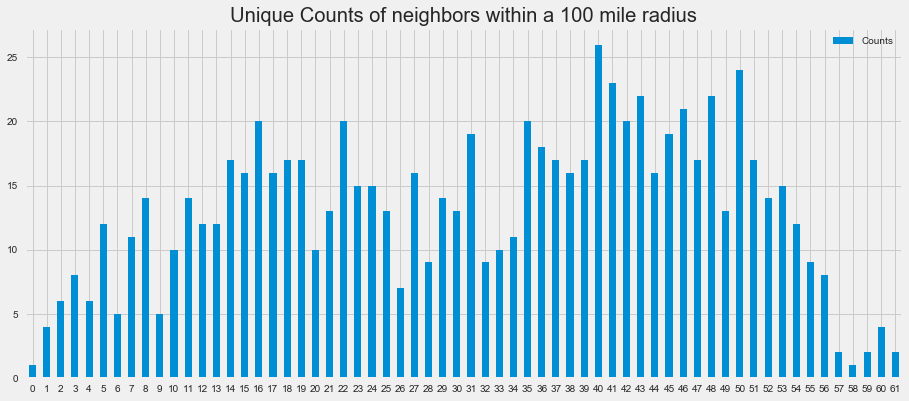

In [23]:
pd.DataFrame({"Counts":cnts}, index=uniq).plot.bar(rot=False, figsize=(14,6),
                                                   title="Unique Counts of neighbors within a 100 mile radius");

In [24]:
kN5_preds = []
for i in range(full_data.shape[0]):
    neighbors = []
    for j in neigh_table[i]:
        n = full_data.iloc[j][pop_list[i]]
        neighbors.append(n)
    kN5_preds.append(np.mean(neighbors))

kN5_preds[:5]

[71.099999999999994,
 137.40000000000001,
 179.14000000000001,
 67.200000000000003,
 105.0]

In [25]:
kN1_preds = []
for i in range(full_data.shape[0]):
    n = full_data.iloc[neigh_table[i][0]][pop_list[i]]
    kN1_preds.append(n)
    
kN1_preds[:5]

[49.299999999999997, 159.0, 181.69999999999999, 79.0, 107.0]

In [26]:
cheating = kN1_preds[r_neighbors.index(0)]
cheating

110.5

In [27]:
kRad_preds = []
for i in range(full_data.shape[0]):
    neighbors = []
    for j in radius_table[i]:
        n = full_data.iloc[j][pop_list[i]]
        neighbors.append(n)
    if neighbors:
        kRad_preds.append(np.mean(neighbors))
    else:
        kRad_preds.append(cheating)

kRad_preds[:5]

[68.974999999999994,
 131.89000000000001,
 174.36000000000001,
 74.727272727272734,
 102.18181818181819]

In [28]:
radius_table2 = k_n.build_radius_table(radius=330)
r_neighbors2 = [len(i) for i in radius_table2]
uniq, cnts = np.unique(r_neighbors2, return_counts=True)
uniq, cnts

(array([  1,   6,   8,   9,  11,  15,  16,  17,  18,  19,  21,  22,  23,
         25,  26,  28,  31,  32,  33,  35,  36,  37,  38,  41,  47,  48,
         54,  58,  60,  61,  63,  64,  65,  67,  68,  70,  71,  72,  73,
         75,  77,  78,  80,  81,  82,  83,  84,  86,  87,  88,  89,  91,
         92,  94,  95,  96,  97,  98,  99, 100, 102, 103, 104, 106, 108,
        109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 121, 122, 123,
        124, 125, 127, 128, 129, 130, 131, 132, 133, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 146, 147, 148, 149, 151, 152, 154, 157,
        158, 159, 160, 161, 162, 163, 165, 167, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 188,
        190, 191, 192, 194, 195, 197, 199, 200, 201, 202, 203, 205, 207,
        208, 209, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222,
        223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 236, 237, 238,
        239, 240, 241, 242, 243, 244, 245, 246, 247

In [29]:
neigh_table = k_n.build_neighbors_table(k=10)
neigh_table[:5]

[array([  4, 709, 701,   3, 698]),
 array([707,   2,   3, 703,   4]),
 array([  3,   1,   4, 707, 703]),
 array([  4, 703,   2, 707,   1]),
 array([  3, 701, 703,   2,   0])]

In [30]:
kN10_preds = []
for i in range(full_data.shape[0]):
    neighbors = []
    for j in neigh_table[i]:
        n = full_data.iloc[j][pop_list[i]]
        neighbors.append(n)
    kN10_preds.append(np.mean(neighbors))

kN10_preds[:5]

[71.099999999999994,
 137.40000000000001,
 179.14000000000001,
 67.200000000000003,
 105.0]

# "Full Data" predictions 

In [46]:
full_LR = pd.read_csv("lin_reg_preds.csv", index_col="fips_code")
full_LR.columns = full_LR.columns.astype(int)
full_LR.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1049,34.631913,52.027978,66.814497,52.135411,43.958523,53.984681,81.235221,24.247766,64.287278,68.299510,26.219179,63.355199,75.479457,45.574938,79.350182,88.215408,55.396023,72.617912,65.263410,78.005847,66.967759,67.843385,101.693782,66.815073,97.979122,88.299342,100.926841,95.059062,57.812295,89.141565,86.286238,105.867050,56.563480,120.034608,116.143169,123.651536,87.480963,72.596041,99.193913,126.399514,95.518035,94.653829,79.353518,134.810228,147.448038,133.907450,130.723507
1077,29.415114,41.895777,51.915774,51.655534,48.866556,39.352884,59.861229,41.093787,49.663385,73.128657,29.614474,53.889996,80.578366,40.615976,66.793414,80.977360,70.968125,66.053112,61.148823,83.111639,58.575811,71.866472,95.779805,75.779570,103.800693,90.651495,84.017000,81.167818,70.603340,99.338006,104.170674,115.712793,80.212457,123.662544,139.820950,116.073618,97.861012,103.269297,104.329036,119.431629,124.850046,97.739608,76.048299,156.332269,138.680504,148.003314,153.436612
1079,18.198196,46.449360,50.477922,44.738271,32.534203,39.648152,46.527074,24.382418,48.081792,62.506544,22.990114,50.556651,75.296052,54.781346,60.867761,82.081520,60.907721,80.232002,43.663604,77.227716,58.575005,80.051570,90.029272,86.327278,106.654974,111.209349,85.848600,91.398446,81.482584,111.512621,102.889844,120.699672,106.830324,125.772575,143.773502,135.846226,104.362942,108.286468,110.953631,123.918048,109.713222,101.469857,80.252130,160.273579,159.071086,158.881209,135.792523
1083,23.967064,37.567118,61.323095,49.077709,51.365954,45.743892,56.995486,41.403150,55.988429,75.899655,33.360790,61.239520,78.586320,46.571050,75.121494,81.953664,67.058363,84.119348,63.917828,74.551628,61.804820,66.670042,106.586049,79.573841,114.379134,92.418932,88.954674,88.409716,84.744503,110.698368,107.856285,113.449439,85.372259,134.879927,152.836829,116.070690,112.002282,101.339767,102.618008,136.899601,130.782220,121.791799,101.553081,163.351575,160.138222,153.310179,152.885547
1089,27.189102,47.823659,69.734348,59.231472,54.564240,60.225393,56.458713,34.039434,61.088412,76.813477,34.815273,74.169754,84.996112,52.354667,82.554759,84.901750,50.796306,79.086342,45.321664,82.214954,68.939108,70.605963,103.849472,82.820937,109.510310,89.144553,97.838841,93.308386,68.463263,110.153528,101.747371,122.584843,91.161127,142.219283,138.702639,123.609595,117.480642,105.363890,113.647271,128.156601,121.447241,137.184736,139.459193,159.937314,156.057793,152.455776,160.122129


In [50]:
FULL_LR_preds = [full_LR.iloc[i][pop_list[i]] for i in range(full_test.shape[0])]

In [53]:
full_HAV_LR = pd.read_csv("lin_reg_haversine_norm_preds.csv", index_col="fips_code")
full_HAV_LR.columns = full_HAV_LR.columns.astype(int)
full_HAV_LR.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1049,27.799793,52.653166,67.156053,55.517722,48.243241,53.739324,85.598020,29.036442,58.549275,66.783325,23.322095,59.111903,81.022932,49.721622,77.808439,90.151592,55.015760,64.644266,53.115857,85.999784,68.814349,78.931728,109.419267,54.009347,99.116044,84.568822,98.676783,91.168447,61.717513,91.312360,79.459584,109.437333,62.992963,125.469705,120.205388,128.278720,77.129232,64.558679,99.273039,113.781052,108.825503,99.775550,84.792709,129.986855,162.596515,148.957180,125.007247
1077,38.797368,43.744009,46.661230,52.550571,43.217804,39.984778,68.205154,41.846970,46.079406,67.834649,34.285082,54.945744,80.360375,37.396526,68.779234,83.506910,74.667624,54.979323,48.958796,85.727060,53.366030,75.760201,102.905193,68.108153,97.145548,87.050693,82.671103,83.907511,62.196786,107.370215,94.537276,127.608307,93.552550,133.590288,139.560646,125.911600,81.977499,95.687144,109.406270,120.483072,135.249490,105.560491,63.112720,152.808314,158.362374,146.850242,140.628504
1079,23.513863,43.131269,52.527293,45.224434,34.950209,40.806944,49.704254,20.026500,54.457219,58.273025,22.410342,52.955106,71.878846,60.632136,64.302917,88.996306,63.335744,79.998973,28.351167,80.937932,48.872863,75.136468,96.715047,78.323056,103.929307,114.380123,84.454989,86.123561,79.794811,112.914210,88.707317,133.932918,127.394345,133.158736,148.019382,139.901316,83.347207,98.387386,106.041981,123.736259,116.668023,117.867613,68.821561,160.732712,181.566746,166.894559,117.295523
1083,22.839291,36.673811,56.003464,51.416697,45.658370,52.372865,69.740422,38.521707,54.684849,64.221732,33.457657,71.898092,82.958146,47.366660,79.046187,82.836844,67.121629,85.501573,47.486179,75.919886,49.300127,72.895863,112.506883,64.654316,115.253476,92.117022,86.423932,86.730505,88.852836,118.209619,103.569564,115.220430,96.688683,142.556663,151.504604,122.431248,89.854212,84.947029,98.640439,137.291264,135.354361,138.208589,99.582680,162.263925,187.971991,157.297743,141.274718
1089,27.815629,51.143178,66.294859,58.647204,54.042583,58.970235,63.573945,33.443425,63.664274,77.180115,33.589999,75.766542,83.900125,59.710717,80.794332,91.807751,49.074694,73.800419,36.107513,88.914299,66.852668,77.364625,108.756781,69.978856,107.401630,86.900885,97.070101,91.068914,70.002722,108.021868,97.713009,132.152297,101.029855,142.970538,138.798244,130.696285,107.627037,98.605788,108.646877,121.712326,130.261082,144.648649,131.030027,163.506464,169.294058,154.494477,146.244384


In [54]:
FULL_HAV_LR_preds = [full_HAV_LR.iloc[i][pop_list[i]] for i in range(full_test.shape[0])]

In [58]:
full_HAV_EXP2_LR = pd.read_csv("lin_reg_hav_norm_exp2_df.csv", index_col="fips_code")
full_HAV_EXP2_LR.columns = full_HAV_EXP2_LR.columns.astype(int)
full_HAV_EXP2_LR.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1049,27.783336,49.557924,68.637939,55.651948,49.012444,53.797166,90.377669,36.049820,54.766590,65.911318,21.428430,58.629002,82.520004,51.152397,71.513103,88.612312,58.024767,55.253433,50.850703,86.755437,68.706871,84.153969,115.327380,46.472768,103.402552,83.415767,93.794232,89.476322,61.576778,94.226035,84.954528,113.023913,65.496112,121.111170,126.158090,137.383121,84.385160,62.057596,105.332714,109.549837,113.907156,98.657708,83.460867,123.312449,158.989484,154.352171,129.986310
1077,40.789629,45.278183,43.335836,54.255294,43.300042,37.432352,67.152414,43.345813,46.663434,64.145583,41.893292,53.646067,78.290741,36.399959,67.451242,82.994111,74.217274,47.889929,47.233311,87.776475,50.936015,72.261620,107.069668,69.466700,89.519725,84.091796,82.744228,86.978874,52.651237,114.509855,88.612626,134.161700,95.079654,138.234949,138.020694,128.561928,82.485401,99.150785,121.826165,124.025812,138.687679,111.220960,55.919722,144.300655,170.800738,146.388387,132.882900
1079,21.788155,37.426878,57.949050,44.453362,34.376453,48.550331,43.555530,18.991312,60.385567,58.463225,22.818832,57.237031,69.367260,68.175612,64.052205,90.894162,60.790942,89.625649,20.672222,80.488531,47.276336,64.186139,98.125216,75.511198,104.113778,119.601107,88.711117,83.597813,84.887672,111.485985,85.749380,141.408041,127.758587,134.679764,148.895988,135.832124,75.625976,91.927459,89.508707,127.250762,111.553869,130.627463,75.086854,160.677387,192.507079,166.083283,112.890913
1083,20.197448,36.275512,54.523745,52.350303,41.414327,59.179197,68.020893,34.209241,57.719439,56.833346,36.045611,81.979541,87.283405,50.065487,85.276518,83.259724,62.184222,94.915052,41.405183,69.721425,41.973484,75.805349,115.606706,53.385165,114.938020,91.883632,85.497694,84.054281,96.410245,113.430636,100.555059,117.710690,97.550855,147.852177,146.043546,120.848663,85.258621,77.403106,93.049024,137.527320,127.987357,142.134951,100.602053,160.924406,199.322213,167.527894,133.839645
1089,27.735365,52.397340,66.454261,56.161688,53.785131,57.106461,65.936662,32.587779,71.138678,80.562823,30.971487,79.516267,80.622455,66.642704,79.449586,94.224335,49.220458,72.301373,36.222432,91.493443,67.977527,78.734273,108.914489,67.833472,108.222650,87.892758,98.607497,89.085878,65.372862,106.944407,96.400596,132.639732,105.570978,140.074826,140.184807,133.814131,98.795766,105.014678,104.623206,118.390246,132.219508,143.875695,126.504216,168.711681,169.899230,152.867752,138.436504


In [59]:
FULL_HAV_LR_EXP2_preds = [full_HAV_EXP2_LR.iloc[i][pop_list[i]] for i in range(full_test.shape[0])]

In [60]:
predictions["FULL_LR_pred"] = FULL_LR_preds
predictions["FULL_HAV_LR_pred"] = FULL_HAV_LR_preds
predictions["FULL_HAV_LR_EXP2_pred"] = FULL_HAV_LR_EXP2_preds

# Predictions

In [31]:
predictions["k_Nearest_One_pred"] = kN1_preds
predictions["k5_Nearest_Mean_pred"] = kN5_preds
predictions["k10_Nearest_Mean_pred"] = kN10_preds
predictions["kRad_Mean_pred"] = kRad_preds
predictions.head()

,years,y_true,lr_preds,exp_smooth_preds0.25,exp_smooth_preds0.5,exp_smooth_preds1,exp_smooth_preds2,exp_smooth_preds4,exp_smooth_preds8,exp_smooth_preds16,k_Nearest_One_pred,k5_Nearest_Mean_pred,k10_Nearest_Mean_pred,kRad_Mean_pred
fips_code,,,,,,,,,,,,,,
01049,1990,60.6,77.394666,108.276167,106.936430,103.159927,90.543474,75.719221,76.081434,73.998780,49.3,71.10,71.10,68.975000
01077,2009,130.0,118.341033,155.943628,155.567922,154.104538,147.530226,144.389319,151.487069,157.571304,159.0,137.40,137.40,131.890000
01079,2014,187.1,134.144136,166.170481,166.867668,168.438153,173.403115,180.790359,182.049028,181.845151,181.7,179.14,179.14,174.360000
01083,1976,68.0,48.356844,82.514826,83.160209,83.604553,78.286418,72.064920,73.735711,76.107268,79.0,67.20,67.20,74.727273
01089,2002,102.0,113.392604,113.695979,112.389391,109.708120,105.680158,105.985647,106.876002,106.994657,107.0,105.00,105.00,102.181818


# Prediction Accuracy Metrics

### Mean Absolute Percentage Error (MAPE)
- Metric commonly used in time series forecasting
- Average percentage of errors in the predictions
    - Disregards the direction (above or below the true value).
    
### Median Absolute Error (MAE)
- Median of the absolute values of the errors. (Robust to outliers)
- Quantifies the deviation from the real values in the original unit (bu/acre in this case).

### Root Mean Squared Error (RMSE)
- Commonly used metric to compare regression models  
    - Only applies to models fit on the same data
    
### R Squared (R2)
- The R-Squared statistic gives an indication of the portion of the model that is effective at explaining the dependent variable.
    - Perfect score of 1.0 
    - Low R-Squared --> independent variables do NOT do a good job at explaining the dependent (target) variable.  
    - High R-Squared --> independent variables do a good job at explaining the dependent (target) variable. 
    - Ex: R-Squared --> 0.65 --> 65% of the variations in yield returns are “explained” by the model, whereas the remaining 35% is “unexplained”).

In [32]:
def mape(y_pred,y_true):
    y_pred = np.asarray(y_pred)
    y_true = np.asarray(y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [61]:
pred_cols = [col for col in predictions.columns if "pred" in col]
MAPE, MAE, R2, RMSE = [], [], [], []

for col in pred_cols:
    MAPE.append(mape(predictions["y_true"], predictions[col]))
    MAE.append(median_absolute_error(predictions["y_true"], predictions[col]))
    R2.append(r2_score(predictions["y_true"], predictions[col]))
    RMSE.append(np.sqrt(mean_squared_error(predictions["y_true"], predictions[col])))
    
metric_df = pd.DataFrame({"MAPE": MAPE, "MAE":MAE, "RMSE":RMSE, "RSQUARED":R2}, 
                         index=[col.upper() for col in pred_cols])
metric_df

,MAE,MAPE,RMSE,RSQUARED
LR_PREDS,15.915163,14.978884,20.694868,0.722731
EXP_SMOOTH_PREDS0.25,20.952114,18.642487,26.363781,0.550022
EXP_SMOOTH_PREDS0.5,19.977592,17.746048,25.317622,0.585025
EXP_SMOOTH_PREDS1,17.502918,15.622482,22.570123,0.670205
EXP_SMOOTH_PREDS2,11.337990,10.590431,15.244645,0.849544
EXP_SMOOTH_PREDS4,8.110220,8.160963,11.187684,0.918968
EXP_SMOOTH_PREDS8,8.443262,8.596622,11.768724,0.910333
EXP_SMOOTH_PREDS16,9.124855,9.241953,12.540231,0.898191
K_NEAREST_ONE_PRED,10.386978,10.493368,13.996791,0.873167
K5_NEAREST_MEAN_PRED,8.638010,8.706716,12.029146,0.906320


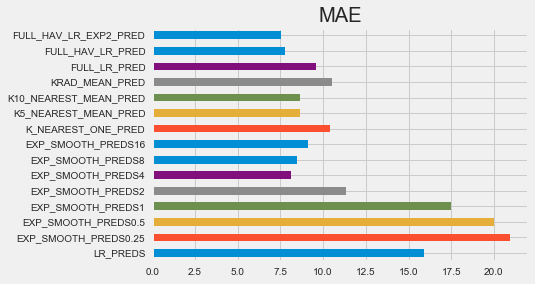

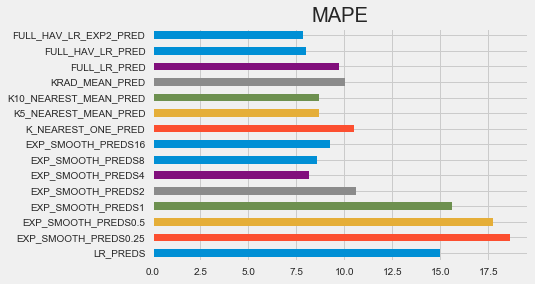

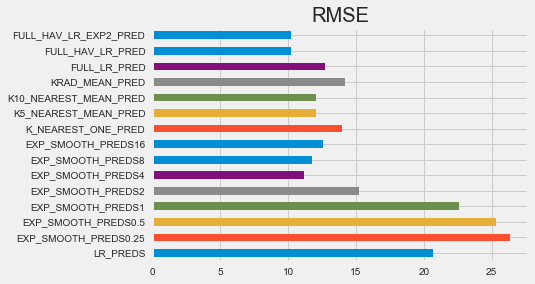

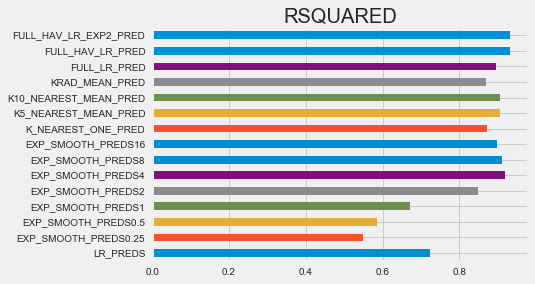

In [62]:
for col in metric_df.columns:
    metric_df[col].plot(kind="barh", title=col)
    plt.show();

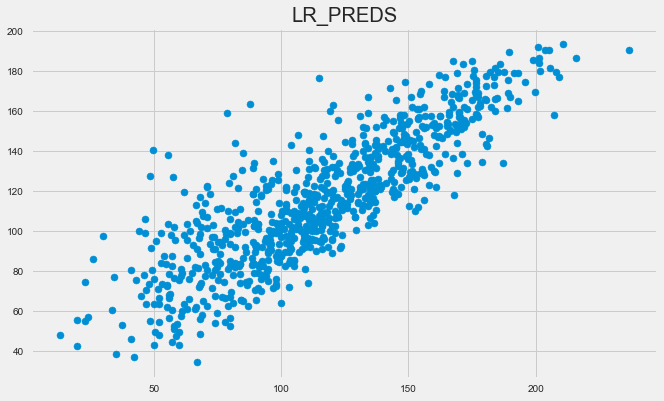

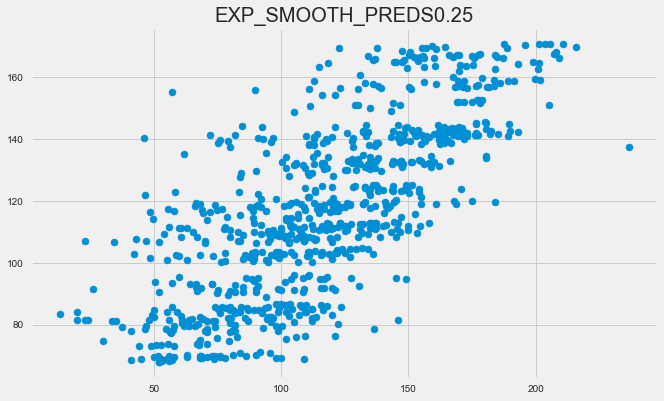

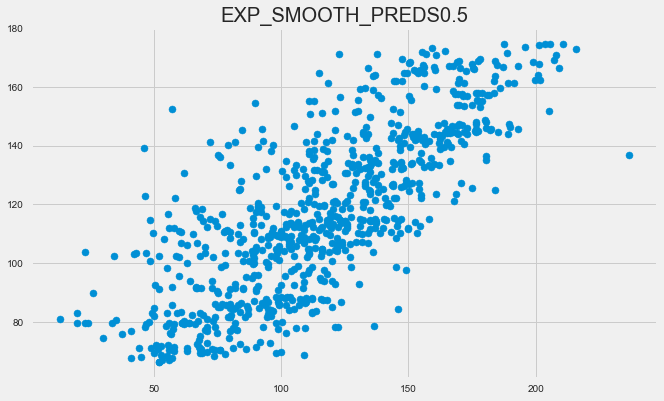

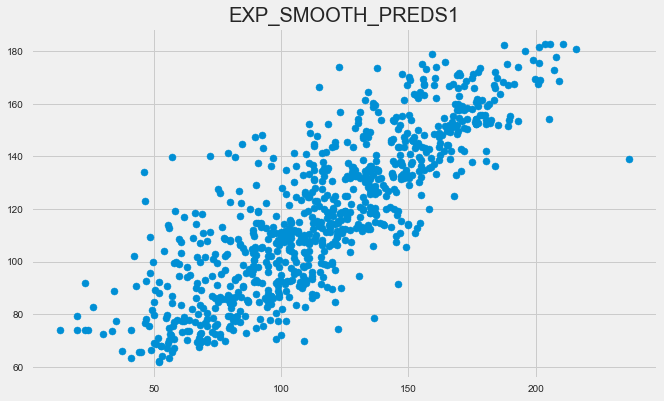

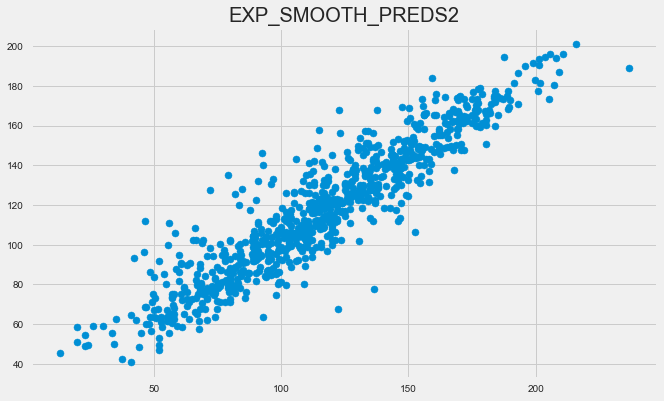

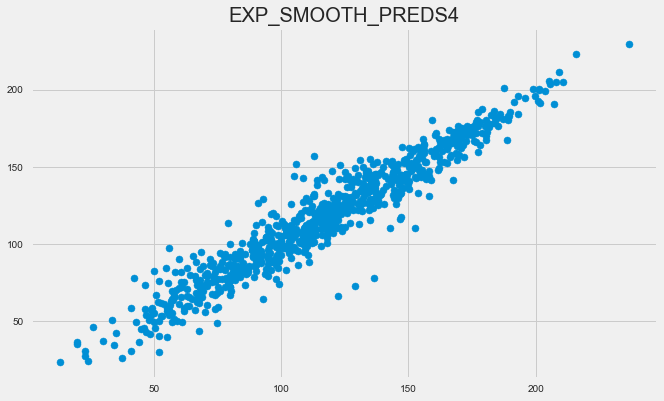

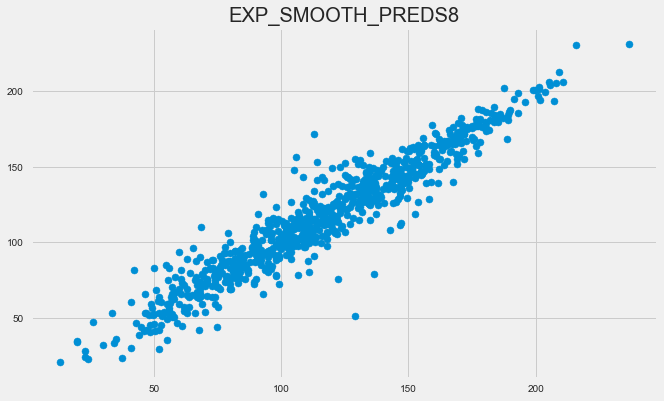

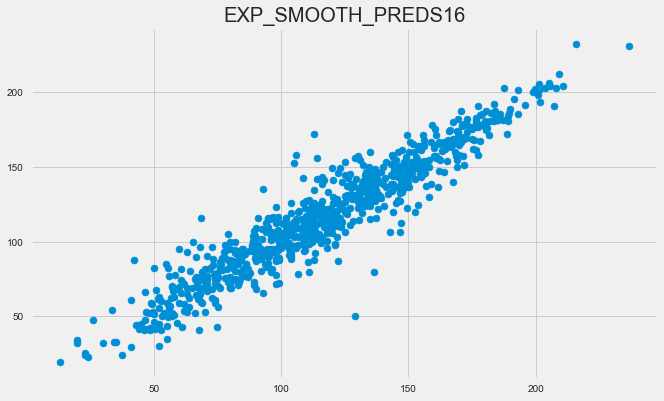

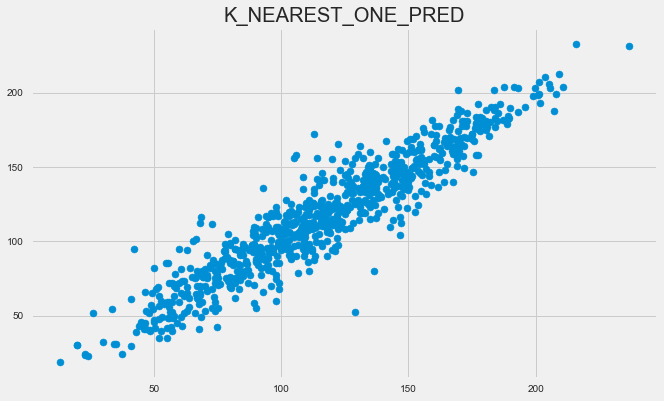

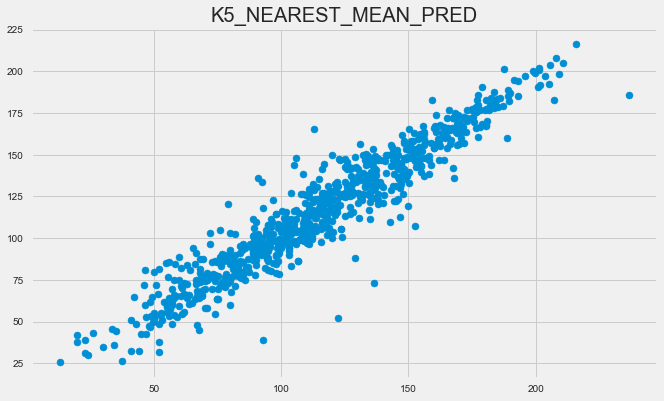

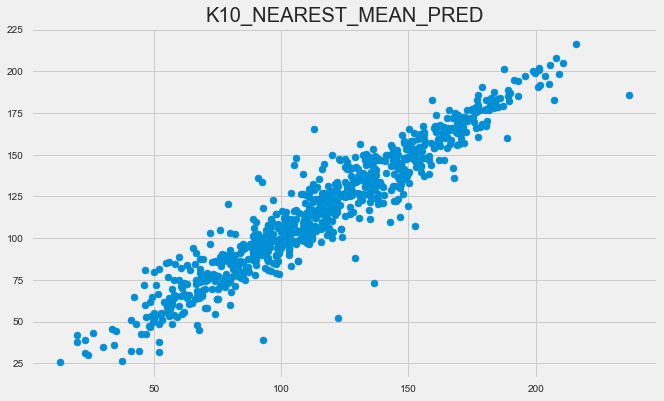

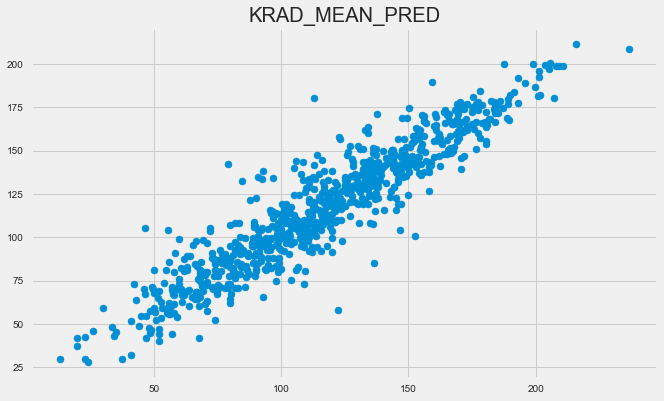

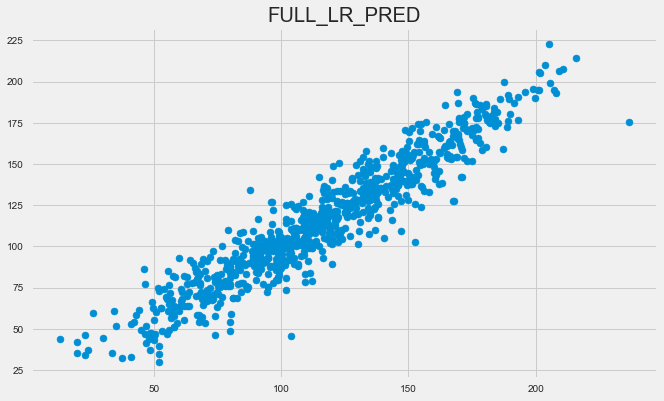

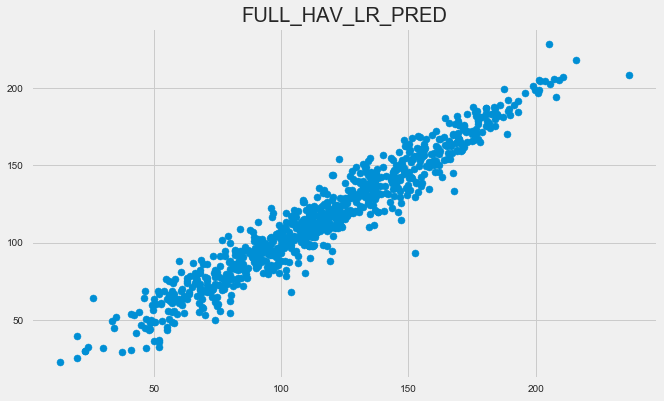

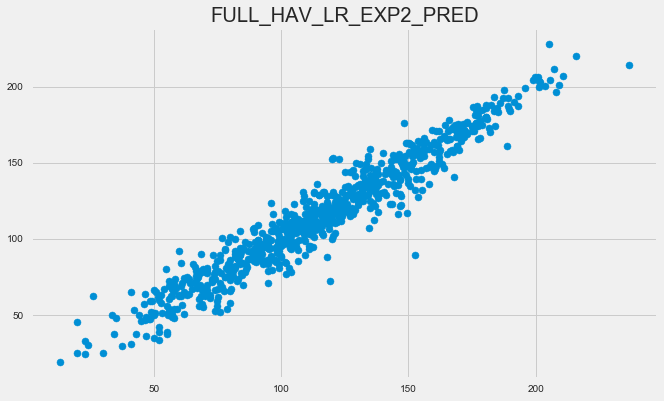

In [63]:
for col in pred_cols: 
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_title(col.upper())
    plt.scatter(predictions["y_true"], predictions[col])
    plt.show();
    print()

In [36]:
from IPython.display import Image
Image(url="http://www.plasenciacigars.com/wp-content/themes/plasencia-cigars-v2/img/hero-hand-with-cigar.png")

# Save dataframe of results

In [37]:
# metric_df.to_csv("corn_metrics.csv")

In [38]:
# for col in pred_cols: 
#     sns.jointplot(data=predictions, x=col, y='y_true', kind='reg', color='g')
#     plt.show();
#     print()

___